### Example Butler-free loop through Warps

In [1]:
import lsst.afw.image as afwImage
import numpy as np
path = "/home/y/yusra/public_html/test_data/HSC/warps/9813/30/HSC-I"

In [2]:
sortedFilenames = []
for i, filename in enumerate(os.listdir(path)):
    sortedFilenames.append(filename)

sortedFilenames.sort()
psfModels = []
for i, filename in enumerate(sortedFilenames):
    f = os.path.join(path, filename)
    exp = afwImage.ExposureD.readFits(f)
    psf = exp.getPsf()
    psfModels.append(psf)
    try:
        shape = psf.computeShape(exp.getBBox().getCenter())
        width = shape.getTraceRadius()
    except:
        print(i, "chip gap at center", filename)
        continue
    print(i, width, filename)


0 2.01793420161683 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1228_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
1 2.061395796510012 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1230_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
2 1.9805239637130756 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1232_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
3 1.8371772729468587 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1238_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
4 2.1362287622796825 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1240_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
5 2.005387544682797 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1242_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
6 1.9275856230501922 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1244_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits
7 1.8693701955114657 deepCoadd_directWarp_HSC_9813_30_i_HSC-I_1246

In [3]:
import matplotlib.pyplot as plt

In [4]:
im = psf.computeKernelImage()

/tmp/ipykernel_14352/910760875.py:1: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  im = psf.computeKernelImage()


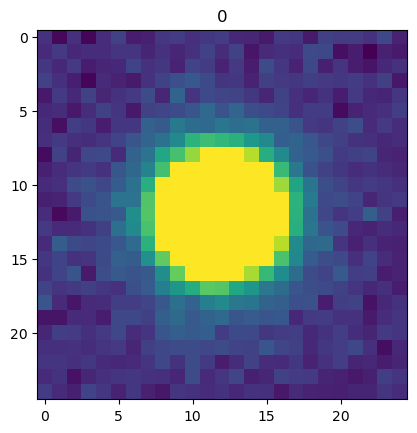

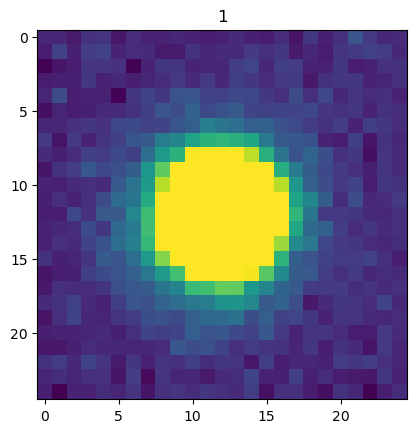

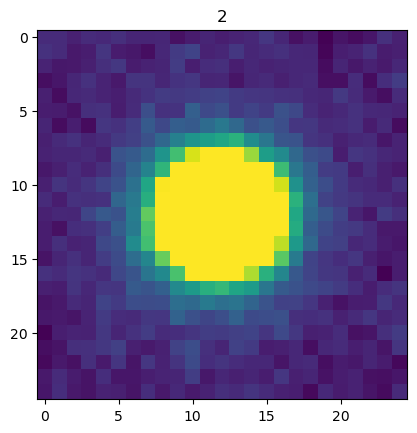

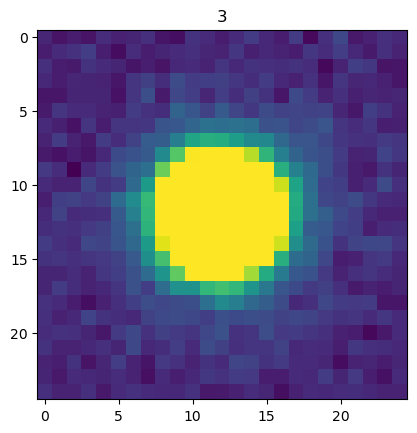

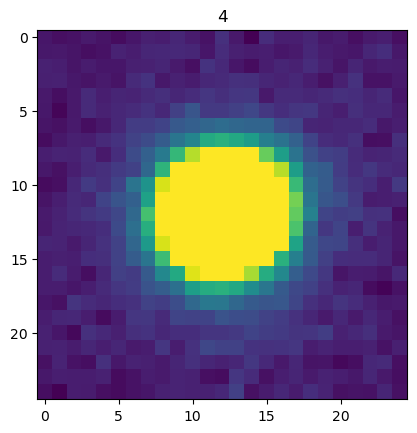

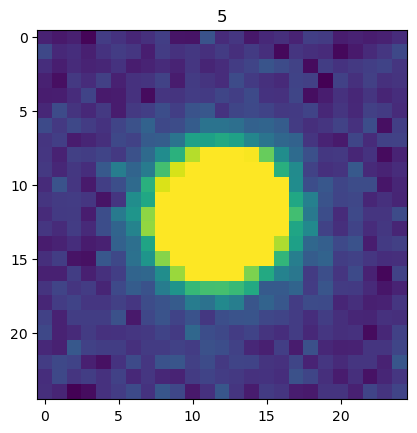

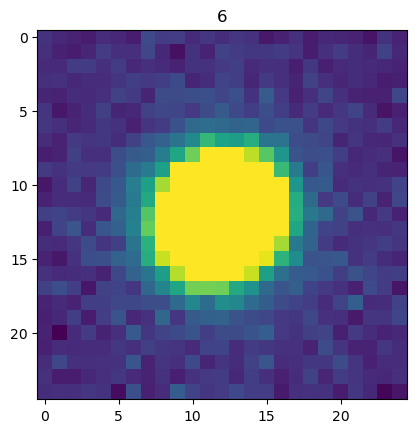

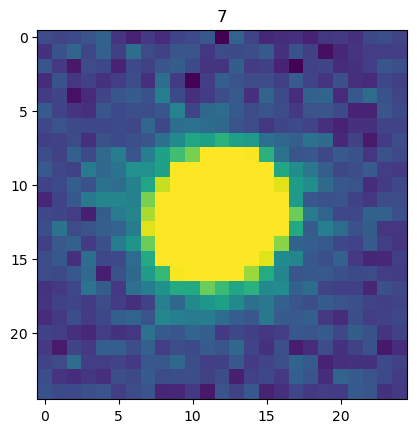

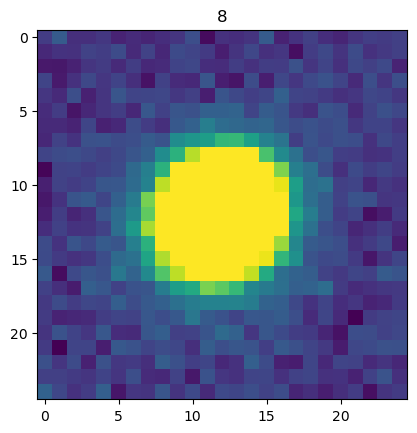

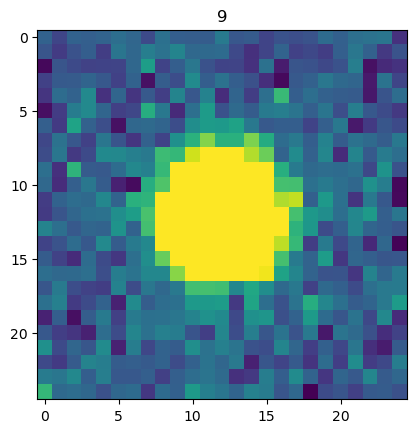

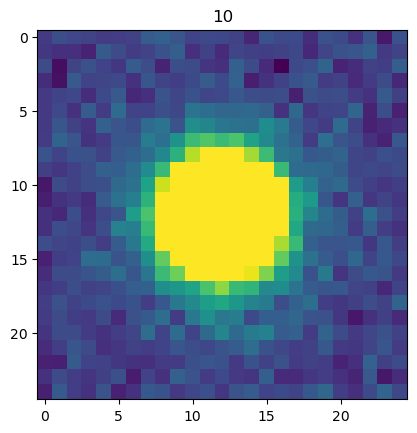

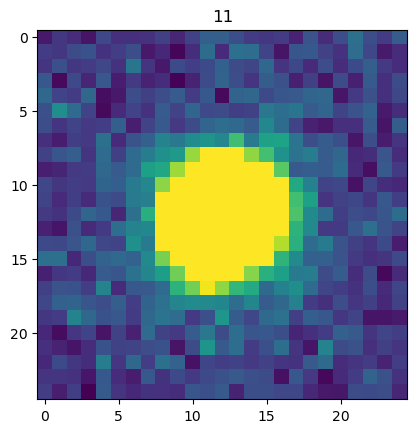

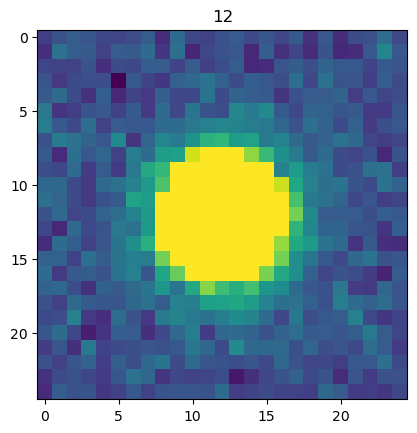

13 chip gap at center deepCoadd_directWarp_HSC_9813_30_i_HSC-I_30504_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits


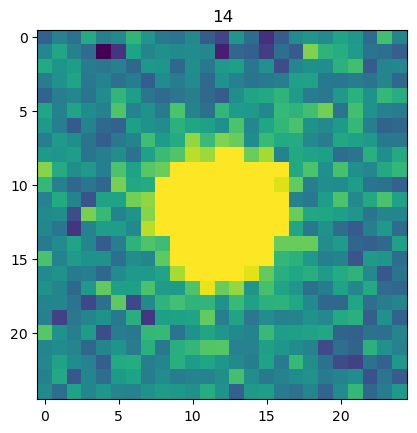

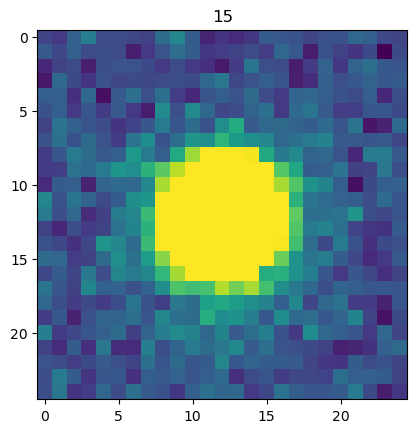

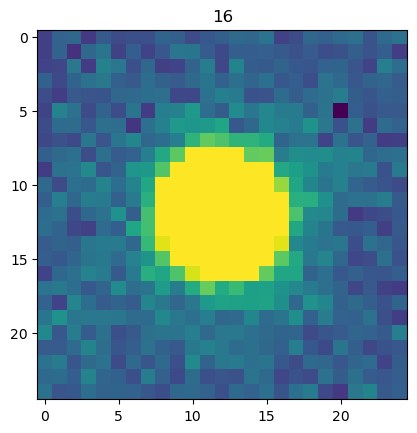

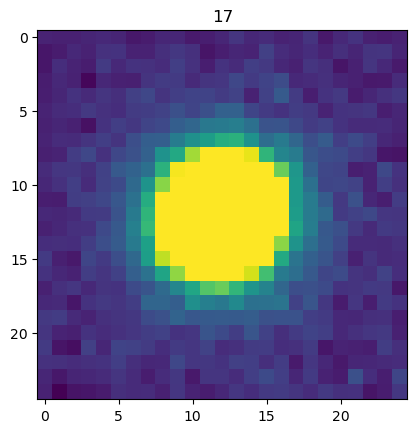

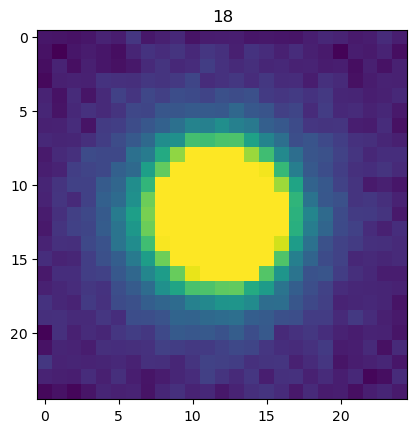

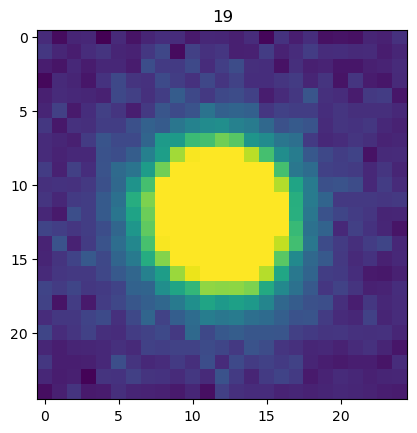

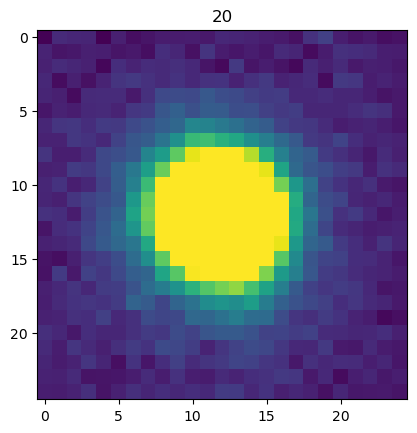

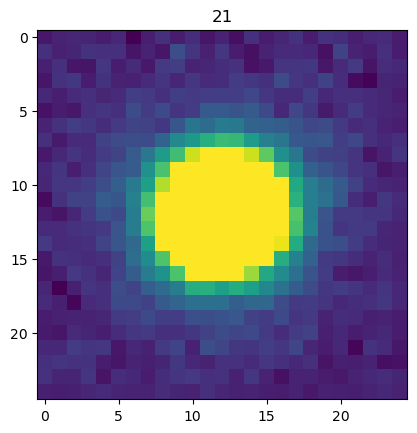

22 chip gap at center deepCoadd_directWarp_HSC_9813_30_i_HSC-I_30504_hsc_rings_v1_HSC_runs_RC2_w_2023_01_DM-37483_20230109T193205Z.fits


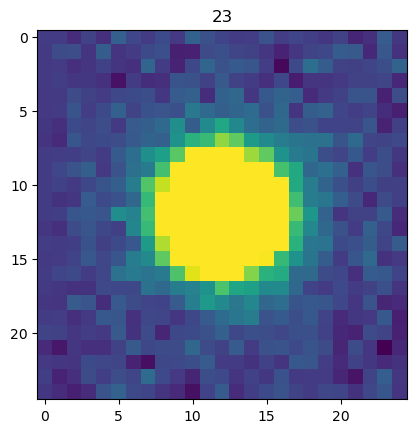

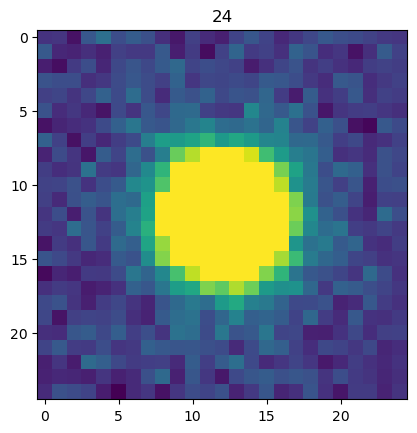

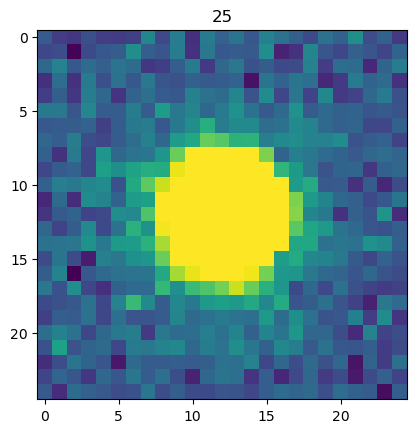

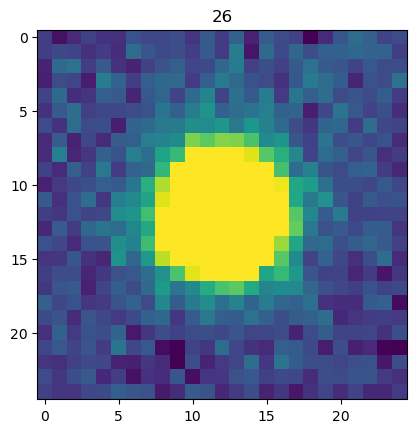

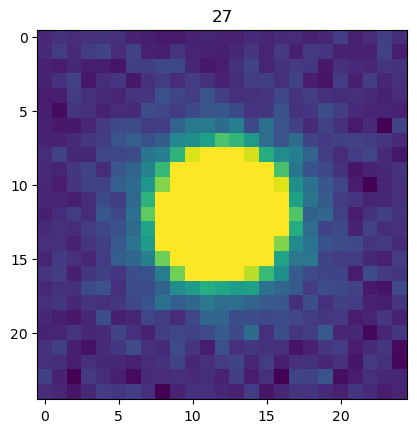

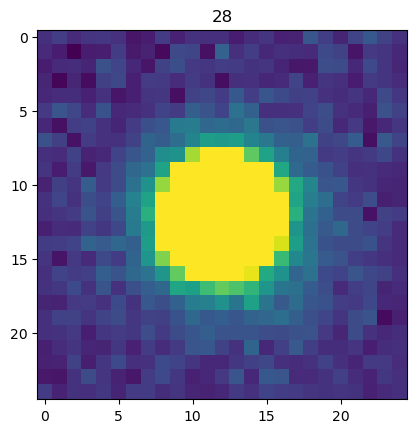

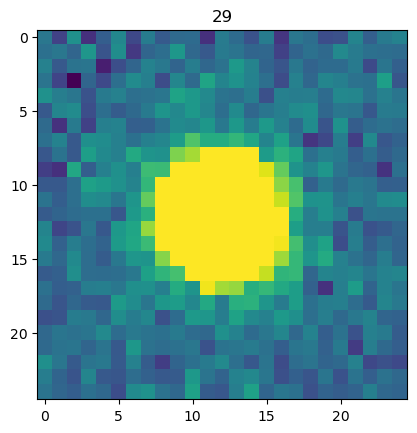

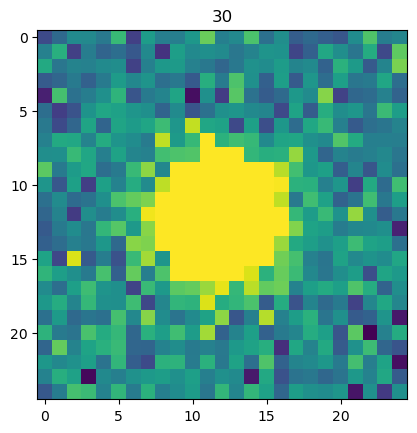

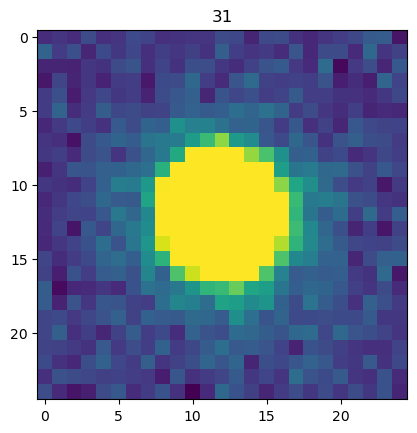

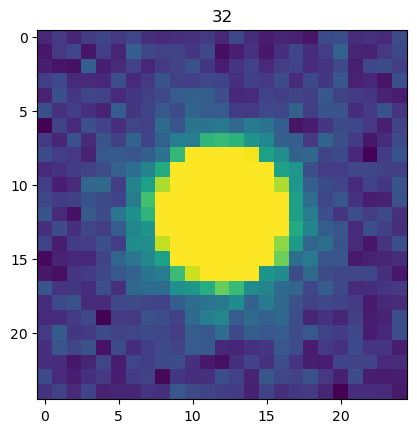

In [5]:
for i, psf in enumerate(psfModels):
    try:
        im = psf.computeKernelImage(exp.getBBox().getCenter())
    except:
        print(i, "chip gap at center", filename)
        continue
    arr = im.array
    vmin, vmax = np.percentile(arr, (0, 90))
    plt.imshow(arr, vmin=vmin, vmax=vmax)
    plt.title(i)
    plt.show()